#### Connor Curtis

#### Section 002

#### April 8, 2025

<center><h1>Predicting and Optimizing the Usage of Bike Sharing Systems</h1></center>

<u><h2>Background and Motivation:</h2></u>

Living on a college campus, I see hundreds of bikes every day and use one myself to get to all of my classes and anywhere else I need to go. At Michigan State's campus, all of the bikes that you see are owned and used by one person, but there are many scooters throughout campus that can be rented if someone needs to hitch a quick ride without making an actual investment into these methods of transportation. However, many cities and their surrounding metropolitan areas actually have rental systems for bicycles known as bike sharing systems that allow people to rent a bike for a short duration of time to get wherever it is that they need to go. After finding a dataset on one of these bikesharing systems, I was eager to start working with it due to my now undeniable dependence on bikes after spending a year at college. I plan to explore how I can predict future usage of the bike sharing system, and how such systems can be optimized. To do so, there are two main goals that I will need to accomplish:

<h3 style="display: inline;">Goal #1:</h3> <h4 style="display: inline;">Successfully create a model of the bike sharing data and use it to predict future bike usage</h4>
<br><br>
<h3 style="display: inline;">Goal #2:</h3> <h4 style="display: inline;">Analyze how rental bike usage changes based on the various factors in the dataset</h4>
<br><br>
<h3 style="display: inline;">Research Question:</h3> <h4 style="display: inline;">How can bike sharing systems such as this one be optimized?</h4>

<u><h2>Context:</h2></u>

The data for the Bike Sharing dataset that I will be using comes from the UC Irvine Machine Learning Repository. The bike usage data was collected and generated by the Capital Bikeshare system from bike sensors that track when it is rented and returned, while the corresponding weather for each instance in the dataset was collected and generated by freemeteo.com via official weather stations, satellites, and radar data.

The data is split into two data sets: one that tracks the bike usage each day for the years of 2011 and 2012, and one that tracks bike usage each hour for the years of 2011 and 2012. Additionally, both datasets contain variables such as the day of the week, whether it's a holiday, the temperature, and type of weather conditions.

The data doesn’t provide insights into the demographics of the people who are using the bikes, which does make some sense though as that may be a breach of privacy. However, it also doesn’t include data on the average time each bike was rented for, or the average distance each bike is used when someone rents it.  

The dataset is somewhat limited due to the fact that it only captures data from two years which limits the amount of data that can be used to draw conclusions from. Additionally, Capital Bikeshare  only serves Washington, D.C., and some counties of the larger metropolitan area so it can't be daid for certain any conclusions I draw can be applied to all bike share companies.

Knowing where the data came from and the limitations of this data set, I will exercise caution when communicating the results that I conclude from my exploration with this data. I will make sure to stay mindful and communicate that my results may not be applicable to all scenarios due to the limitations of my dataset.


<u><h2>Goal #1 Methodology:</h2></u>

Load in and make any necessary changes to clean the data and improve how easily it can be understood. Then, using the data that details daily bike usage, create a graph that shows daily bike usage for each day over the two years of 2011 and 2012 that are contained in the dataset. Next, create a model to fit the data in this graph and can be used to predict future bike usage. Finally, evaluate the accuracy/success of this model.

In [108]:
#load in the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import display
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

In [109]:
#load in and display both the hourly and daily datasets
bikes_hourly = pd.read_csv("bikes_hour.csv")
bikes_daily = pd.read_csv("bikes_day.csv")

display(bikes_hourly.head())
display(bikes_daily.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [110]:
#rename some columns in the dataset for better clarity
bikes_hourly = bikes_hourly.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'cnt': 'total'})
bikes_daily = bikes_daily.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'cnt': 'total'})

#denormalize the columns containing normalized data for better understanding
bikes_hourly['temp'] = bikes_hourly['temp'] * 47 - 8
bikes_hourly['atemp'] = bikes_hourly['atemp'] * 66 -16
bikes_hourly['hum'] = bikes_hourly['hum'] * 100
bikes_hourly['windspeed'] = bikes_hourly['windspeed'] * 67

#denormalize the columns containing normalized data for better understanding
bikes_daily['temp'] = bikes_daily['temp'] * 47 - 8
bikes_daily['atemp'] = bikes_daily['atemp'] * 66 -16
bikes_daily['hum'] = bikes_daily['hum'] * 100
bikes_daily['windspeed'] = bikes_daily['windspeed'] * 67

display(bikes_hourly.head())
display(bikes_daily.head())

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,3.28,3.0014,75.0,0.0,0,1,1


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,82,1518,1600


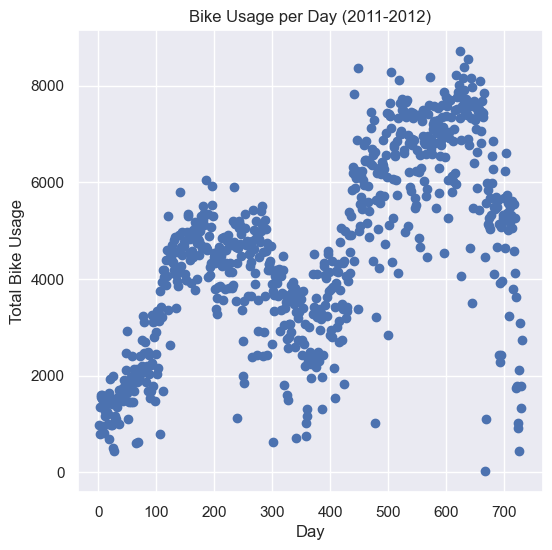

0.6288302722083062


In [111]:
#create a plot of total bike usage for each day of the year
sns.set_theme()
plt.figure(figsize = (6,6))
plt.scatter(bikes_daily['instant'],bikes_daily['total'])
plt.xlabel('Day')
plt.ylabel('Total Bike Usage')
plt.title('Bike Usage per Day (2011-2012)')
plt.savefig('plain bike usage plot', dpi=300, bbox_inches='tight')
plt.show()

#compute the correlation of day and bike usage
correlation_usage = np.corrcoef(bikes_daily['instant'], bikes_daily['total'])[0,1]
print(correlation_usage)

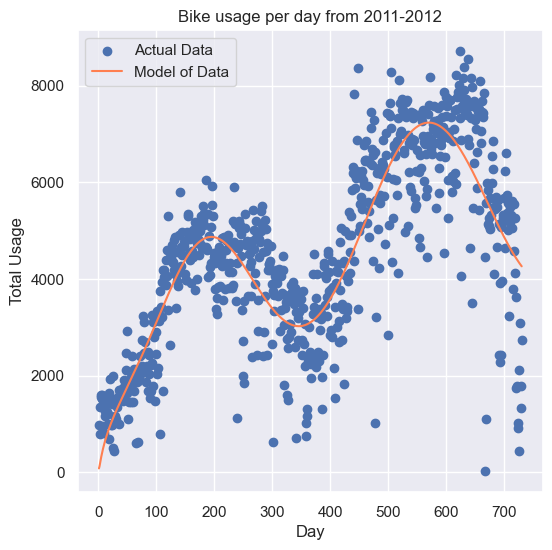

R-squared: 0.7120890036155708
Mean Absolute Error: 770.7472196382641
RMSE: 1038.7448784516832


In [112]:
#ChatGPT helped by suggesting using logistic growth on amplitude, but I didn't use direct code
#Prompt: “How can I create the equation of a sine curve the increases in amplitude, but eventually flattens out?"
#April 8, 2025

#create a function that returns an equation which can be used to model the data
def model_function(x, A, k, x0, B, C, D):

    amplitude = A / (1 + np.exp(-k * (x - x0)))
    floor = D * (np.log(x))**2

    return floor + (amplitude * (np.sin(B * x + C))**2)

#establish initial parameters
p0 = [10000, 0.005, 365, np.pi / 365, 0, 0]

#use the curve_fit function in tandem with my model_function to obtain the best parameters for my model
parameters, ignore = curve_fit(model_function, bikes_daily['instant'], bikes_daily['total'], p0)

#unpack the parameters
a_fit = parameters[0]
k_fit = parameters[1]
x0_fit = parameters[2]
B_fit = parameters[3]
C_fit = parameters[4]
D_fit = parameters[5]

#obtain a the set of y values that can be used to model my data
y_fit = model_function(bikes_daily['instant'], a_fit, k_fit, x0_fit, B_fit, C_fit, D_fit)

#plot both the data and the model
plt.figure(figsize = (6,6))
plt.scatter(bikes_daily['instant'],bikes_daily['total'], label = 'Actual Data')
plt.plot(bikes_daily['instant'], y_fit, label="Model of Data", color = 'coral')
plt.xlabel("Day")
plt.ylabel("Total Usage")
plt.title("Bike usage per day from 2011-2012")
plt.legend()
plt.savefig('modeled bike usage plot', dpi=300, bbox_inches='tight')
plt.show()

#calculate the r-squared value to evaluate the succcess of the model
r_squared = r2_score(bikes_daily['total'], y_fit)
print("R-squared:", r_squared)

#calculate the mean absolute error of my model
mae = mean_absolute_error(bikes_daily['total'], y_fit)
print("Mean Absolute Error:", mae)

#calculate the mean squared error of my model
rmse = np.sqrt(mean_squared_error(bikes_daily['total'], y_fit))
print("RMSE:", rmse)

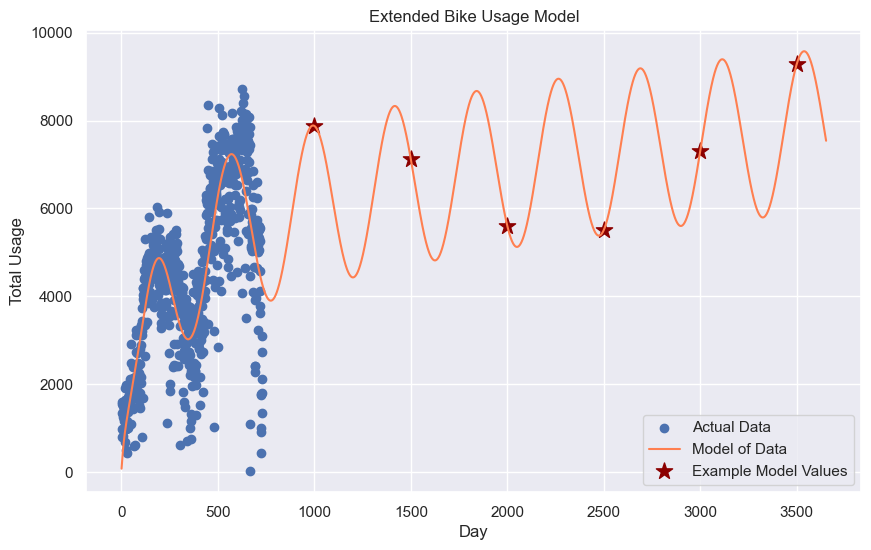

Bike usage for day 1000 (Sep 27, 2013) is: 7879.308020154998
Bike usage for day 1500 (May 11, 2015) is: 7123.187466631501
Bike usage for day 2000 (Dec 23, 2016) is: 5603.9262066253295
Bike usage for day 2500 (Aug 06, 2018) is: 5510.729209633648
Bike usage for day 3000 (Mar 19, 2020) is: 7315.413880812806
Bike usage for day 3500 (Nov 01, 2021) is: 9288.711267543467


In [113]:
p0 = [10000, 0.005, 365, np.pi / 365, 0, 0]
parameters, ignore = curve_fit(model_function, bikes_daily['instant'], bikes_daily['total'], p0)

a_fit = parameters[0]
k_fit = parameters[1]
x0_fit = parameters[2]
B_fit = parameters[3]
C_fit = parameters[4]
D_fit = parameters[5]

#create an array that can be used to extend my model to a 10-year timeline
x = np.linspace(1,3652,3652)
y_fit = model_function(x, a_fit, k_fit, x0_fit, B_fit, C_fit, D_fit)

#create an array of a variety days to show how the model predicts future values
x_model_values = np.array([1000, 1500, 2000, 2500, 3000, 3500])
days = ['Sep 27, 2013', 'May 11, 2015', 'Dec 23, 2016', 'Aug 06, 2018', 'Mar 19, 2020', 'Nov 01, 2021']
y_model_values = model_function(x_model_values, a_fit, k_fit, x0_fit, B_fit, C_fit, D_fit)

plt.figure(figsize = (10,6))
plt.scatter(bikes_daily['instant'],bikes_daily['total'], label = 'Actual Data')
plt.plot(x, y_fit, label = 'Model of Data', color = 'coral')
plt.scatter(x_model_values, y_model_values, color = 'darkred', marker = '*', s = 150, label = 'Example Model Values')
plt.xlabel('Day')
plt.ylabel('Total Usage')
plt.title('Extended Bike Usage Model')
plt.legend()
plt.savefig('extended model plot', dpi=300, bbox_inches='tight')
plt.show()

#display the predicted values of the model
for i in range(len(x_model_values)):
        print(f"Bike usage for day {x_model_values[i]} ({days[i]}) is: {y_model_values[i]}")

In [114]:
#establish the length in days that each season, for both years, lasts for
winter2011 = len(bikes_daily[(bikes_daily['season'] == 1) & (bikes_daily['year'] == 0)])
spring2011 = len(bikes_daily[(bikes_daily['season'] == 2) & (bikes_daily['year'] == 0)])
summer2011 = len(bikes_daily[(bikes_daily['season'] == 3) & (bikes_daily['year'] == 0)])
fall2011 = len(bikes_daily[(bikes_daily['season'] == 4) & (bikes_daily['year'] == 0)])
winter2012 = len(bikes_daily[(bikes_daily['season'] == 1) & (bikes_daily['year'] == 1)])
spring2012 = len(bikes_daily[(bikes_daily['season'] == 2) & (bikes_daily['year'] == 1)])
summer2012 = len(bikes_daily[(bikes_daily['season'] == 3) & (bikes_daily['year'] == 1)])
fall2012 = len(bikes_daily[(bikes_daily['season'] == 4) & (bikes_daily['year'] == 1)])

#create lists of season lengths and names to use in the following for loop
season_lengths = [winter2011, spring2011, summer2011, fall2011, winter2012, spring2012, summer2012, fall2012]
season_names = ['Winter 2011', 'Spring 2011', 'Summer 2011', 'Fall 2011', 'Winter 2012', 'Spring 2012', 'Summer 2012', 'Fall 2012']

#initialize lists for storing error values
mae_list = []
rmse_list = []
initial = 0

for i in range(len(season_lengths)):

    end = season_lengths[i] + initial
    
    #calculate the mean absolute error of my model
    mae = mean_absolute_error(bikes_daily['total'][initial:end], y_fit[initial:end])
    mae_list.append(mae)
    print(f"Mean Absolute Error of {season_names[i]} is: {mae}")

    #calculate the mean squared error of my model
    rmse = np.sqrt(mean_squared_error(bikes_daily['total'][initial:end], y_fit[initial:end]))
    rmse_list.append(rmse)
    print(f"Root Mean Squared Error of {season_names[i]} is: {rmse}")

    print()
    initial = end

Mean Absolute Error of Winter 2011 is: 453.0767093000215
Root Mean Squared Error of Winter 2011 is: 596.1032956353268

Mean Absolute Error of Spring 2011 is: 521.0569485660902
Root Mean Squared Error of Spring 2011 is: 673.465530797281

Mean Absolute Error of Summer 2011 is: 664.4822993565136
Root Mean Squared Error of Summer 2011 is: 866.9063011098547

Mean Absolute Error of Fall 2011 is: 798.3729365892134
Root Mean Squared Error of Fall 2011 is: 974.3354913085744

Mean Absolute Error of Winter 2012 is: 825.2644258073958
Root Mean Squared Error of Winter 2012 is: 1051.4288979869414

Mean Absolute Error of Spring 2012 is: 882.336479320538
Root Mean Squared Error of Spring 2012 is: 1170.4086192153507

Mean Absolute Error of Summer 2012 is: 807.081114372786
Root Mean Squared Error of Summer 2012 is: 1034.6757676800942

Mean Absolute Error of Fall 2012 is: 1225.2348691857553
Root Mean Squared Error of Fall 2012 is: 1616.7705059246487



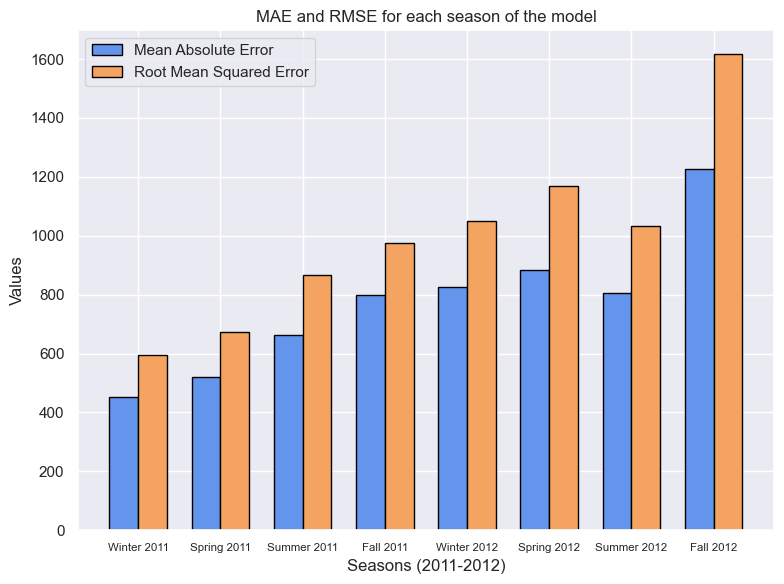

In [115]:
#create positions for each set of bars
x = np.arange(8)
width = 0.35

#establish the bar labels, and the value of each bar
categories = ['Winter 2011','Spring 2011','Summer 2011','Fall 2011','Winter 2012','Spring 2012','Summer 2012','Fall 2012']
values1 = mae_list
values2 = rmse_list

plt.figure(figsize = (8,6))

#create two sets of bars for MAE and RMSE
plt.bar(x - width/2, values1, width, label='Mean Absolute Error', color = 'cornflowerblue', edgecolor = 'black')
plt.bar(x + width/2, values2, width, label='Root Mean Squared Error', color = 'sandybrown', edgecolor = 'black')

#customize plot
plt.xlabel('Seasons (2011-2012)')
plt.ylabel('Values')
plt.title('MAE and RMSE for each season of the model')
plt.xticks(x, categories, rotation = 0, size = 8.25)
plt.tight_layout()
plt.legend()
plt.savefig('MAE & RMSE bar graph', dpi=300, bbox_inches='tight')
plt.show()

<u><h2>Goal #2 Methodology:</h2></u>

Using subsetting and masking, as well as computations, explore the relationships between bike usage and the various variables present in the data sets. Generate visualizations that detail these relationships, and provide insights on which variables influence bike usage, and how they influence it.

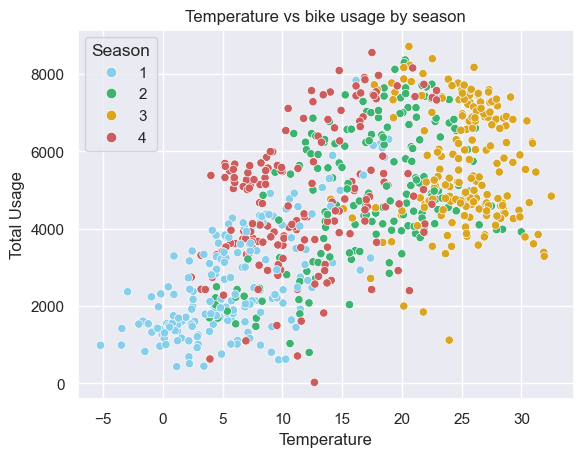

0.6274940090334916


In [118]:
#create a scatter plot of temperature and bike usage grouped by season
sns.scatterplot(data = bikes_daily, x = 'temp', y = 'total',
                hue = 'season', palette = ['skyblue', 'mediumseagreen', 'goldenrod', 'indianred'])
plt.xlabel('Temperature')
plt.ylabel('Total Usage')
plt.title('Temperature vs bike usage by season')
plt.legend(fontsize=11, markerscale=1.25, title_fontsize=12.5, title = 'Season')
plt.savefig('Temperature by season', dpi=300, bbox_inches='tight')
plt.show()

#compute the correlation of temperature and bike usage
correlation_temp = np.corrcoef(bikes_daily['temp'], bikes_daily['total'])[0,1]
print(correlation_temp)

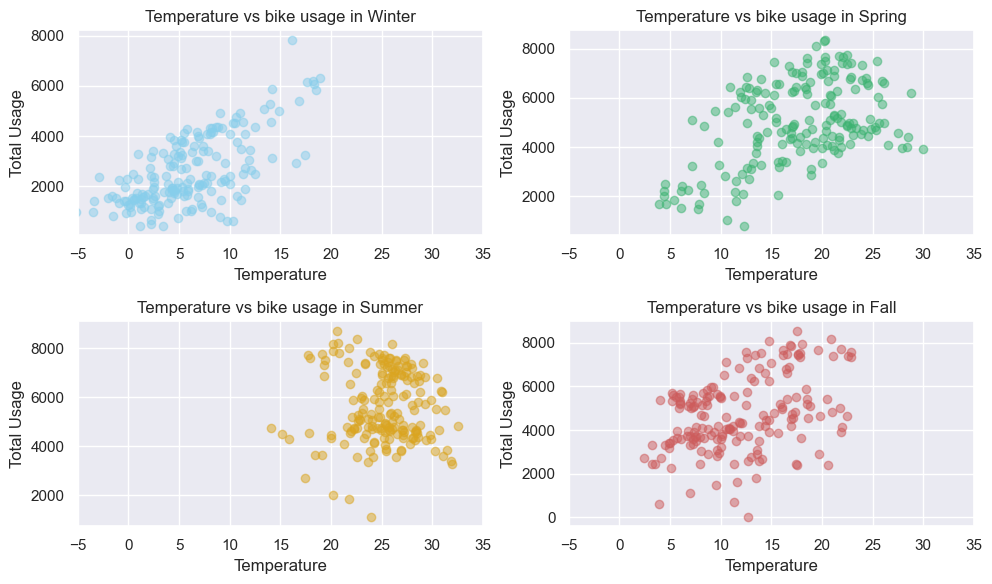

In [119]:
#create separate subplots of temperature and bike usage for each season in order for an easier visualization
plt.figure(figsize = (10,6))

plt.subplot(2,2,1)
plt.scatter(bikes_daily['temp'][(bikes_daily['season'] == 1)], bikes_daily['total'][(bikes_daily['season'] == 1)], color = 'skyblue', alpha = 0.5)
plt.xlim(-5,35)
plt.xlabel('Temperature')
plt.ylabel('Total Usage')
plt.title('Temperature vs bike usage in Winter')

plt.subplot(2,2,2)
plt.scatter(bikes_daily['temp'][(bikes_daily['season'] == 2)], bikes_daily['total'][(bikes_daily['season'] == 2)], color = 'mediumseagreen', alpha = 0.5)
plt.xlim(-5,35)
plt.xlabel('Temperature')
plt.ylabel('Total Usage')
plt.title('Temperature vs bike usage in Spring')

plt.subplot(2,2,3)
plt.scatter(bikes_daily['temp'][(bikes_daily['season'] == 3)], bikes_daily['total'][(bikes_daily['season'] == 3)], color = 'goldenrod', alpha = 0.5)
plt.xlim(-5,35)
plt.xlabel('Temperature')
plt.ylabel('Total Usage')
plt.title('Temperature vs bike usage in Summer')

plt.subplot(2,2,4)
plt.scatter(bikes_daily['temp'][(bikes_daily['season'] == 4)], bikes_daily['total'][(bikes_daily['season'] == 4)], color = 'indianred', alpha = 0.5)
plt.xlim(-5,35)
plt.xlabel('Temperature')
plt.ylabel('Total Usage')
plt.title('Temperature vs bike usage in Fall')

plt.tight_layout()
plt.savefig('Temperature for each separate season', dpi=300, bbox_inches='tight')
plt.show()

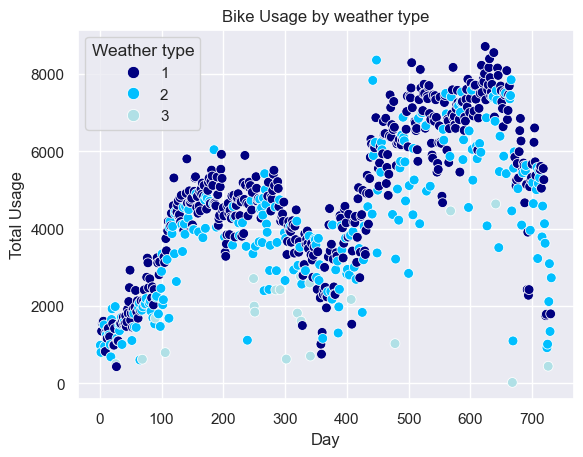

In [120]:
#create a scattter plot of bike usage each day grouped by weather type
sns.scatterplot(data = bikes_daily, x='instant', y='total', hue='weathersit', s = 50, palette = ['navy','deepskyblue','powderblue'])
plt.xlabel('Day')
plt.ylabel('Total Usage')
plt.title('Bike Usage by weather type')
plt.legend(fontsize=11, markerscale=1.25, title_fontsize=12.5, title = 'Weather type')
plt.savefig('Bike usage by weather type', dpi=300, bbox_inches='tight')
plt.show()

In [121]:
#create a mask for each type of weather
weather1_mask = bikes_daily.weathersit == 1
weather2_mask = bikes_daily.weathersit == 2
weather3_mask = bikes_daily.weathersit == 3

#apply each mask to the data to create subsets
weather1 = bikes_daily[weather1_mask]
weather2 = bikes_daily[weather2_mask]
weather3 = bikes_daily[weather3_mask]

#establish lists for weather type names and their respective subsets
weather_names = ['Weather Type 1', 'Weather Type 2', 'Weather Type 3']
weather_subsets = [weather1, weather2, weather3]

#initialize list for storing mean values
weather_means = []

#create a for loop to compute the mean usage in each weather type
for i in range(len(weather_names)):
    mean = np.round(np.mean(weather_subsets[i]['total']))
    weather_means.append(mean)
    print(f'The mean total bike usage for {weather_names[i]} is: {mean}')

The mean total bike usage for Weather Type 1 is: 4877.0
The mean total bike usage for Weather Type 2 is: 4036.0
The mean total bike usage for Weather Type 3 is: 1803.0


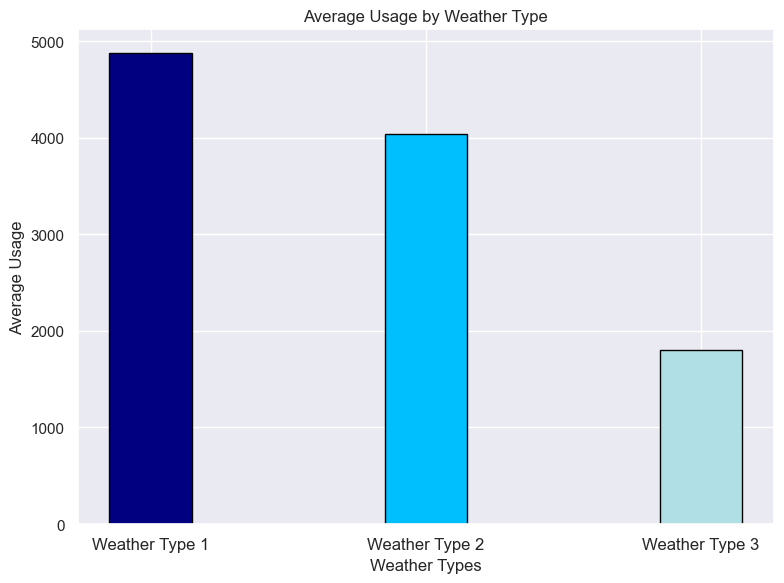

In [122]:
#establish positions for each bar
x = np.arange(3)
width = 0.3

#estblish labels for each bar, the value of each bar, and the color of each bar
categories = ['Weather Type 1', 'Weather Type 2', 'Weather Type 3']
colors = ['navy', 'deepskyblue','powderblue']
values = weather_means

#set figure size
plt.figure(figsize = (8,6))

#create one bar at each position
plt.bar(x, values, width, color = colors, edgecolor = 'black')

#customize plot
plt.xlabel('Weather Types')
plt.ylabel('Average Usage')
plt.title('Average Usage by Weather Type')
plt.xticks(x, categories, rotation = 0, size = 12)
plt.tight_layout()
plt.savefig('Average Usage by Weather type (bar graph)', dpi=300, bbox_inches='tight')
plt.show()

In [123]:
#use for loops to establish the amount of occurances for each weather type in each season
weather1_list = []
for i in range(1,5):
    occurances = len(bikes_daily[(bikes_daily['season'] == i) & (bikes_daily['weathersit'] == 1)])
    weather1_list.append(occurances)

weather2_list = []
for i in range(1,5):
    occurances = len(bikes_daily[(bikes_daily['season'] == i) & (bikes_daily['weathersit'] == 2)])
    weather2_list.append(occurances)

weather3_list = []
for i in range(1,5):
    occurances = len(bikes_daily[(bikes_daily['season'] == i) & (bikes_daily['weathersit'] == 3)])
    weather3_list.append(occurances)

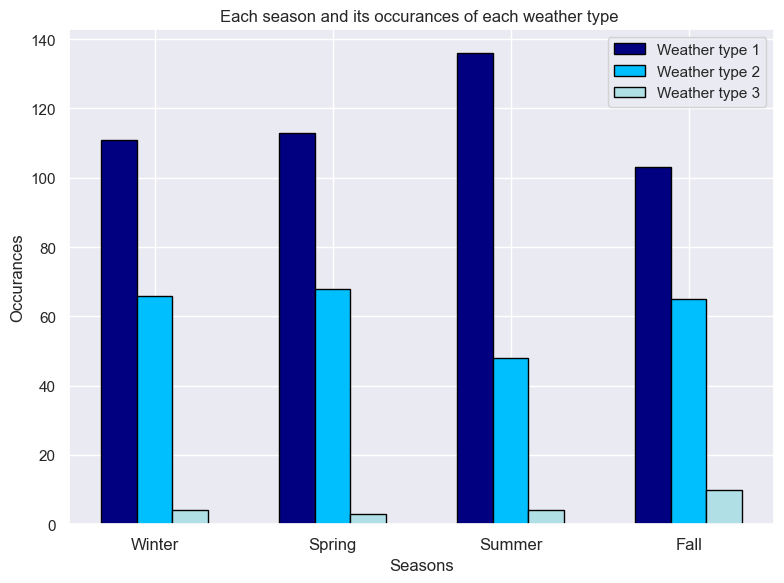

In [124]:
#create positions for each set of bars
x = np.arange(4)
width = 0.2

#establish bar labels and the values of each bar
categories = ['Winter', 'Spring', 'Summer', 'Fall']
values1 = weather1_list
values2 = weather2_list
values3 = weather3_list

#set figure size
plt.figure(figsize = (8,6))

#create three bars at each x position that correspond to each weather type
plt.bar(x - width, values1, width, label='Weather type 1', color = 'navy', edgecolor = 'black')
plt.bar(x, values2, width, label='Weather type 2', color = 'deepskyblue', edgecolor = 'black')
plt.bar(x + width, values3, width, label='Weather type 3', color = 'powderblue', edgecolor = 'black')

#customize plot
plt.xlabel('Seasons')
plt.ylabel('Occurances')
plt.title('Each season and its occurances of each weather type ')
plt.xticks(x, categories, rotation = 0, size = 12)
plt.tight_layout()
plt.legend()
plt.savefig('Weather type by season', dpi=300, bbox_inches='tight')
plt.show()

In [125]:
#create a mask for each day of the week
monday_mask = bikes_daily.weekday == 0
tuesday_mask = bikes_daily.weekday == 1
wednesday_mask = bikes_daily.weekday == 2
thursday_mask = bikes_daily.weekday == 3
friday_mask = bikes_daily.weekday == 4
saturday_mask = bikes_daily.weekday == 5
sunday_mask = bikes_daily.weekday == 6

#apply the each mask to the dataset
monday = bikes_daily[monday_mask]
tuesday = bikes_daily[tuesday_mask]
wednesday = bikes_daily[wednesday_mask]
thursday = bikes_daily[thursday_mask]
friday = bikes_daily[friday_mask]
saturday = bikes_daily[saturday_mask]
sunday = bikes_daily[sunday_mask]

#estblish list of names and subsets for further use
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_subsets = [monday, tuesday, wednesday, thursday, friday, saturday, sunday]

#initialize list for storing total values
day_totals = []

#use a for loop to calculate total bike usage for each day of the week
for i in range(len(day_names)):
    total = np.sum(day_subsets[i]['total'])
    day_totals.append(total)
    print(f'Total bike usage on {day_names[i]} is: {total}')

Total bike usage on Monday is: 444027
Total bike usage on Tuesday is: 455503
Total bike usage on Wednesday is: 469109
Total bike usage on Thursday is: 473048
Total bike usage on Friday is: 485395
Total bike usage on Saturday is: 487790
Total bike usage on Sunday is: 477807


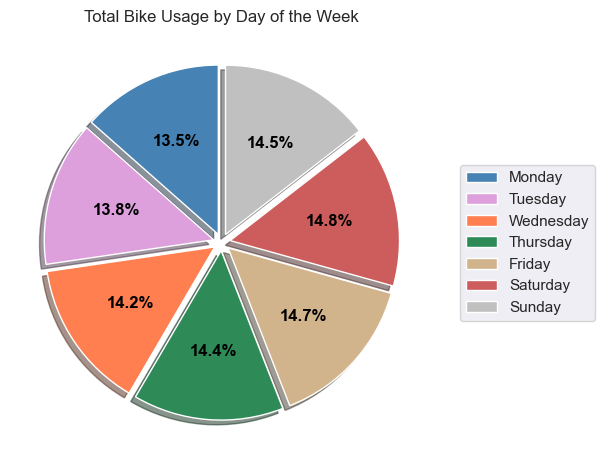

In [126]:
#establish the labels and color for each slice of the pie chart
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['steelblue', 'plum', 'coral', 'seagreen', 'tan', 'indianred', 'silver']

#create and customize the pie chart
plt.pie(day_totals, colors = colors, shadow = True, explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05],
        autopct='%1.1f%%', textprops={'color': 'black', 'weight': 'bold'}, startangle = 90)

#customize the rest of the figure
plt.title('Total Bike Usage by Day of the Week')
plt.legend(labels, bbox_to_anchor=(1.4, 0.7), loc='upper right')
plt.tight_layout()
plt.savefig('Usage by day of week (pie chart)', dpi=300, bbox_inches='tight')
plt.show() 

In [127]:
#create masks for eight, three hour increments
midnight_mask = bikes_hourly.hour.isin([0,1,2])
small_hours_mask = bikes_hourly.hour.isin([3,4,5])
early_morning_mask = bikes_hourly.hour.isin([6,7,8])
late_morning_mask = bikes_hourly.hour.isin([9,10,11])
early_afternoon_mask = bikes_hourly.hour.isin([12,13,14])
late_afternoon_mask = bikes_hourly.hour.isin([15,16,17])
evening_mask = bikes_hourly.hour.isin([18,19,20])
night_mask = bikes_hourly.hour.isin([21,22,23])

#apply each mask to the data to create subsets
midnight = bikes_hourly[midnight_mask]
small_hours = bikes_hourly[small_hours_mask]
early_morning = bikes_hourly[early_morning_mask]
late_morning = bikes_hourly[late_morning_mask]
early_afternoon = bikes_hourly[early_afternoon_mask]
late_afternoon = bikes_hourly[late_afternoon_mask]
evening = bikes_hourly[evening_mask]
night = bikes_hourly[night_mask]

#establish lists of names and subsets for further use
hour_times = ['12-3am', '3-6am', '6-9am', '9-12pm', '12-3pm', '3-6pm', '6-9pm', '9-12am']
hour_subsets = [midnight, small_hours, early_morning, late_morning, early_afternoon, late_afternoon, evening, night]

#intiliaze a list to store hourly totals
hour_totals = []

#create a for loop that will compute the total bike usage for each subset
for i in range(len(hour_times)):
    total = np.sum(hour_subsets[i]['total'])
    hour_totals.append(total)
    print(f'Total bike usage on {hour_times[i]} is: {total}')

Total bike usage on 12-3am is: 79646
Total bike usage on 3-6am is: 26863
Total bike usage on 6-9am is: 470304
Total bike usage on 9-12pm is: 437015
Total bike usage on 12-3pm is: 544985
Total bike usage on 3-6pm is: 747757
Total bike usage on 6-9pm is: 701111
Total bike usage on 9-12am is: 284998


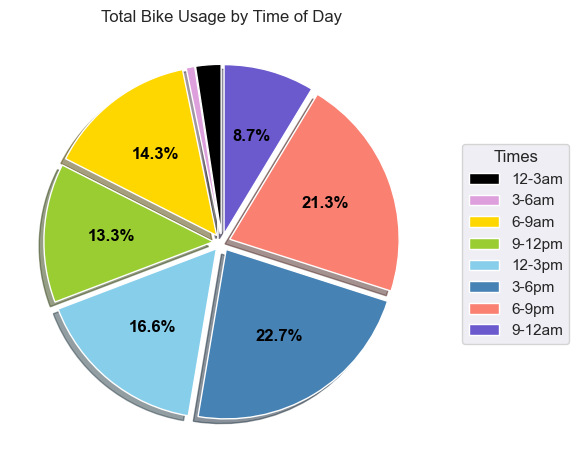

In [128]:
#ChatGPT generated function that removes percent values of small slivers on pie chart to reduce clutter
#Prompt: “Very small pie chart slivers are causing the displayed percents to overlap. How can I get rid of percent values on just the small pieces?”
#(April 20, 2025)
def autopct_filter(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''

#establish labels and colors for each slice of pie chart
labels = hour_times
colors = ['black', 'plum', 'gold', 'yellowgreen', 'skyblue', 'steelblue', 'salmon', 'slateblue']

#create pie chart
plt.pie(hour_totals, colors = colors, shadow = True, explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
        autopct = autopct_filter, textprops={'color': 'black', 'weight': 'bold'}, startangle = 90)

#customize figure
plt.title('Total Bike Usage by Time of Day')
plt.legend(labels, title="Times", bbox_to_anchor=(1.05, .75), loc='upper left')
plt.tight_layout()
plt.savefig('Usage by time of day (pie chart)', dpi=300, bbox_inches='tight')
plt.show() 

<u><h2>Goal #1 Results and Analysis:</h2></u>

To accomplish Goal #1, I had to create a model of the bike sharing data that would allow me to predict future bike usage. In addition to creating this model, I also used several methods to evaluate how well it fit my data, and its overall success.

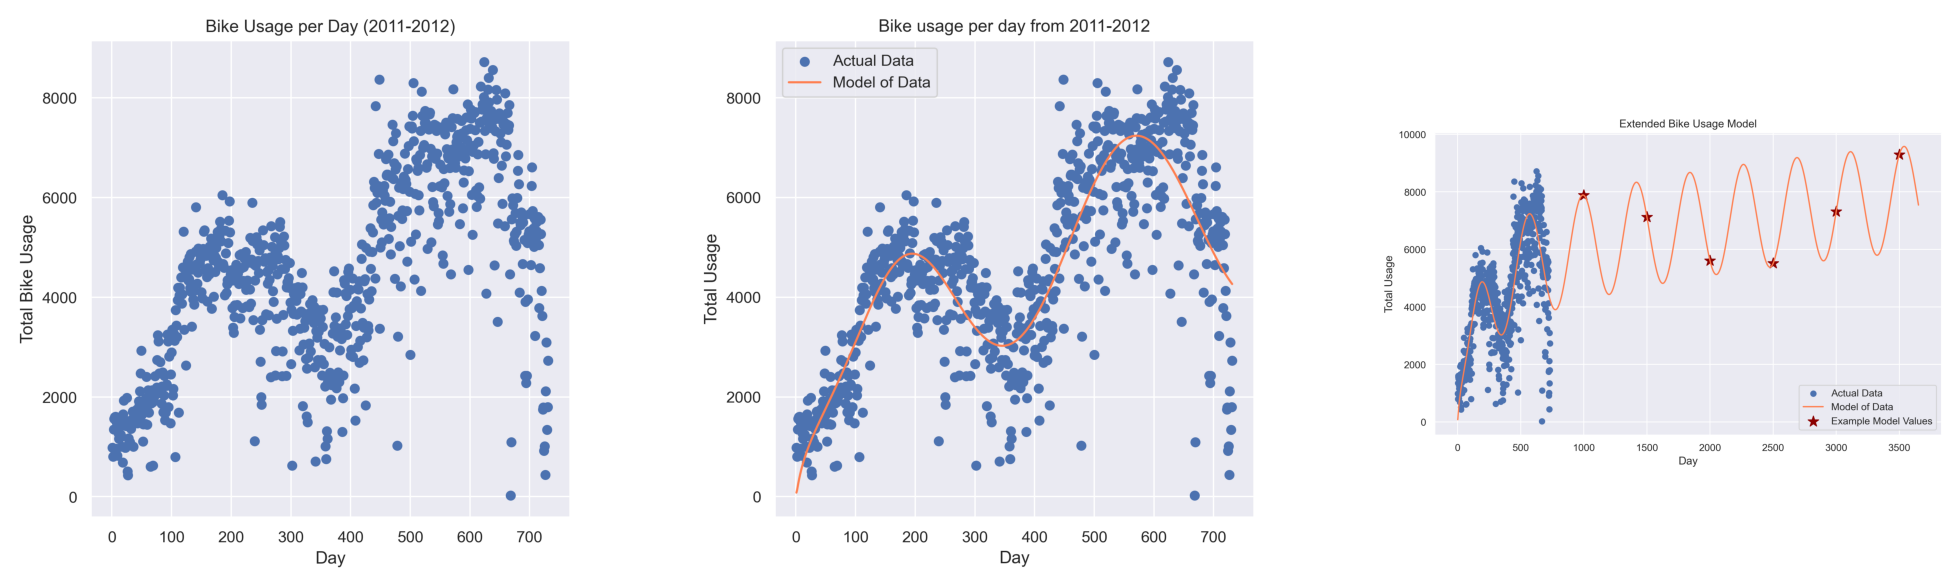

In [131]:
#import plots from methodology
image1 = mpimg.imread('plain bike usage plot.png')
image2 = mpimg.imread('modeled bike usage plot.png')
image3 = mpimg.imread('extended model plot.png')

plt.figure(figsize = (25,15))

plt.subplot(1,3,1)
plt.imshow(image1)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image2)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image3)
plt.axis('off')

plt.show()

Initially observing the relationship between bike usage and the days each year via the first figure, it's evident that a linear function isn't going to be able to completely model this data. The correlation coefficient of the graph which was 0.629 proves that there is a general positive correlation between the day of the year and total bike usage. So as days increase, the usage will also tend to increase. Since the coefficient is 0.629, which is still far from 1, the previous assumption that I will need a different equation to model the data stays true. The data appears to fluctuate, and resembles a sine curve, however, the correlation coefficient indicates that in the long run total bike usage will increase as time passes. This means that a regular sine curve won't be able to fit the data since the amplitude of a regular sine continuously reaches the same peak, rather than increasing after each period. Therefore, to model this data I had to use a sine curve with increasing amplitudes and increasing troughs in order to create the best model possible. The second figure displays the model as well as the original data, and from simply looking at the figure it's obvious that the model fits the data quite well. The calculated r-squared value of the model ends up being 0.712, which concludes that my model covers 71.2% of variance present in the data, which is quite good considering I'm modeling real, fluctuating data. The third figure depicts the model in a 10-year time frame, so it is extended 8 years past the available data. As you can see the model steadily increases in amplitude, and the floor of the model also increases as well. The reason the model begins to level off overtime because bike usage can't infinitely increase, and it's more likely that given time it will either increase very slowly, or reach a constant usage. In order to depict this idea, I curbed amplitude using logistic growth, and created the floor for my model using a logistic function. This finished model can then be used to predict bike usage in the future, which was on of the main tasks I had to accomplish to complete Goal #1 and get closer to answering my overall question. Some sample values that it can predict are as follows:
- Bike usage for day 1000 (Sep 27, 2013) is: 7879.308
- Bike usage for day 1500 (May 11, 2015) is: 7123.187
- Bike usage for day 2000 (Dec 23, 2016) is: 5603.926
- Bike usage for day 2500 (Aug 06, 2018) is: 5510.729
- Bike usage for day 3000 (Mar 19, 2020) is: 7315.414
- Bike usage for day 3500 (Nov 01, 2021) is: 9288.711
  
Additionally, the model has a mean absolute error (MAE) of 770.747 which simply conveys that the model is off by an average of 770.7474 when predicting bike usage. This isn't too bad considering that the daily fluctuations of bike usage within the data can vary by the thousands, but it can certainly be improved. The model also has a root mean squared error (RMSE) of 1038.745 which is another measure of average error, similar to MAE but is more sensitive to outliers and extreme values which will be useful later on. Having calculated and analyzed these measures of error, I was curious to see if error was occurring more in certain parts of my model in order to get a better idea of where it is most and least accurate. To do this, I took the MAE and RMSE for each season during the years (2011 & 2012) that are included in the data:

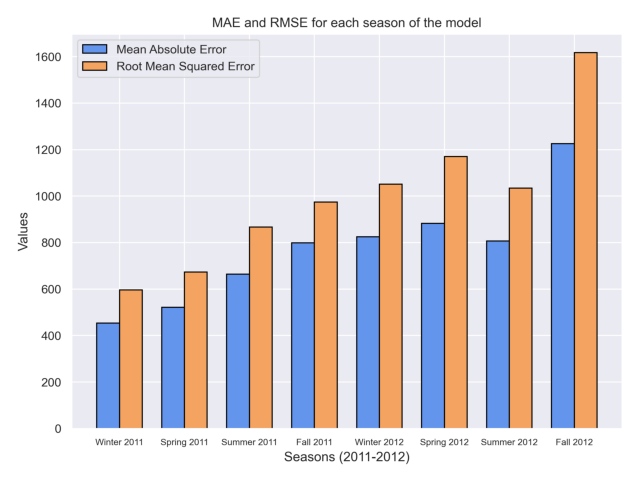

In [194]:
#import plot from methodology
image4 = mpimg.imread('MAE & RMSE bar graph.png')

plt.figure(figsize = (9,6))

plt.imshow(image4)
plt.axis('off')
plt.show()

The bar graph above depicts the MAE and RMSE for each season of 2011 and 2012, with the exact values being displayed in the methodology section. For the first four seasons, the MAE and RMSE slowly increase which makes sense as the very beginning of the model is likely going to fit the data the best. Unlike the 2011 seasons, which mainly show that some error will be introduced as the model runs for a bit, the 2012 seasons display a different pattern that allows us to draw some insightful conclusions about where my model is losing accuracy. The MAE and RMS for both winter and summer in 2012 are roughly identical, and have similar errors to the fall season of 2011. These two seasons display errors that begin to flatten out which shows that as my model progresses, these two seasons are more accurate. However, spring and fall in 2012 demonstrate higher errors, rather than flattening out, with the fall off 2012 displaying a staggering increase in its MAE and RMSE at 1225.23 and 1616.77 respectively. This leads to my main motivation for Goal #2. In order to determine why error in my model is occuring, and why such drastic error is occuring during periods such as spring and fall, I must examine how the other variables present in the dataset affect bike usage.

<u><h2>Goal #2 Results and Analysis:</h2></u>

To accomplish Goal #2, I had to examine the relationships between the other variables present in the dataset and how they potentially influenced bike usage. By doing this, I can get a better idea on why the model created in Goal #1 has errors, and more information can be gathered that can then be used to help companies like this one optimize their system.

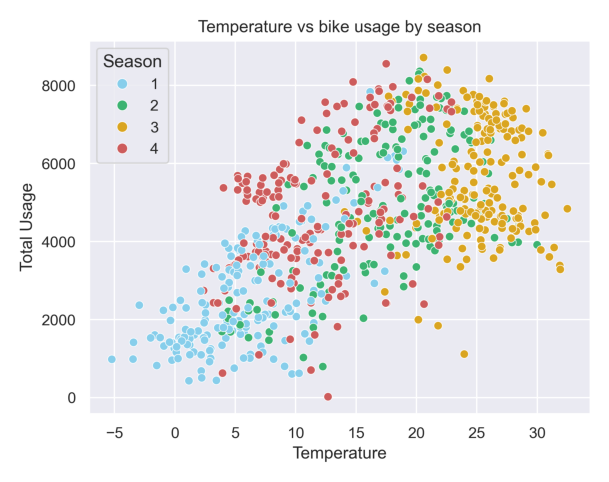

In [137]:
#import plot from methodology
image5 = mpimg.imread('Temperature by season.png')

plt.figure(figsize = (10,6))

plt.imshow(image5)
plt.axis('off')
plt.show()

The graph above depicts how temperature influences bike usage. After analyzing the graph, it's clear that generally as temperature increases so does bike usage. The correlation coefficient of these two variables, being 0.627, supports the idea that the two are positively correlated. Though 0.627 is still a bit away from a perfect positive correlation of 1, this makes sense due to the fact that the many different variables present in the dataset makes it impossible for just one variable, such as temperature, to have a direct linear relationship with bike usage. The graph additionally is categorized by the different seasons, which shows that as temperature changes with the seasons, so does the bike usage. In order to get a clearer visual of the relationship between temperature and bike usage for each season, and potentially discover why some seasons had more error than others, I can split this plot into four different subplots (one for each season).

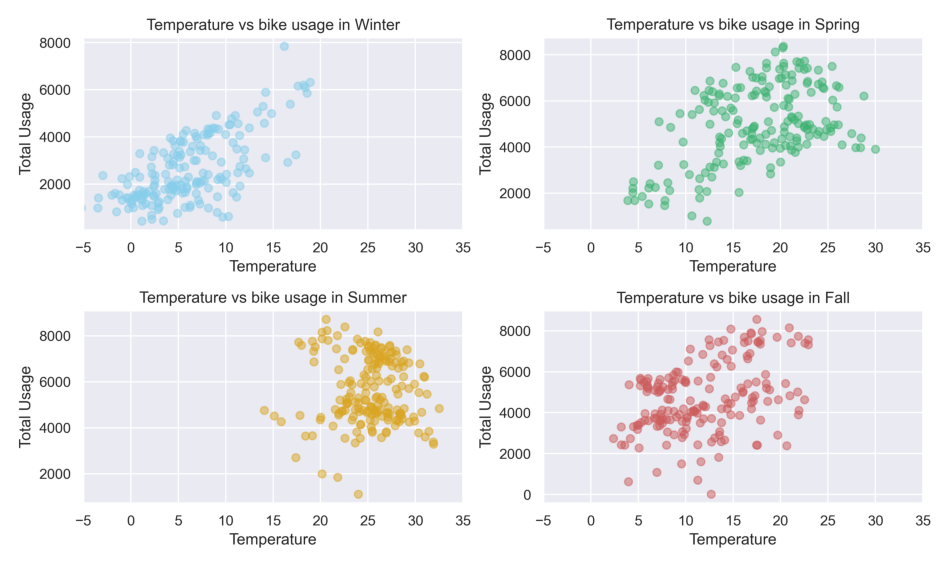

In [192]:
#import plot from methodology
image6 = mpimg.imread('Temperature for each separate season.png')

plt.figure(figsize = (12,10))

plt.imshow(image6)
plt.axis('off')

plt.show()

These separate plots allow us to draw a few meaningful conclusions about each season, and they help to explain why some seasons in my model may show higher errors compared to others. Firstly, the data points in the summer and winter plots are much more tightly clustered which indicates that those two seasons demonstrate a more consistent behavior not only in their bike usage, but also in their temperatures. This tight clustering makes it easier for the model to make "good" predictions about bike usage, and is likely what caused those two seasons to have less error in the second year. Spring and fall don't exhibit the same tight clustering that summer and winter do, which is actually good as it provides an explanation for the error of these two seasons. Spring has the greatest variability in temperature, and since we've already established that temperature does have an influence on bike usage, it makes sense that if temperatures vary by a lot in spring then so will bike usage in the spring. This is a great contributor to any error found in the spring portion of my model. Finally, looking at the fall subplot, there are a few more interesting insights that can be gathered. First, though the temperatures in fall vary some, they don't vary nearly as much as the temperatures in spring. Initially, this doesn't make too much sense, as fall had a very large MAE compared to the other seasons, and a staggeringly large RMSE. Though temperature likely had some part in this, it's plausible to assume that there is another variable in the data that has a large influence on bike usage, and that is contributing to the error in the season of fall. To see if this is true, I will analyze the graphs depicting the different weather conditions that occur in each season.

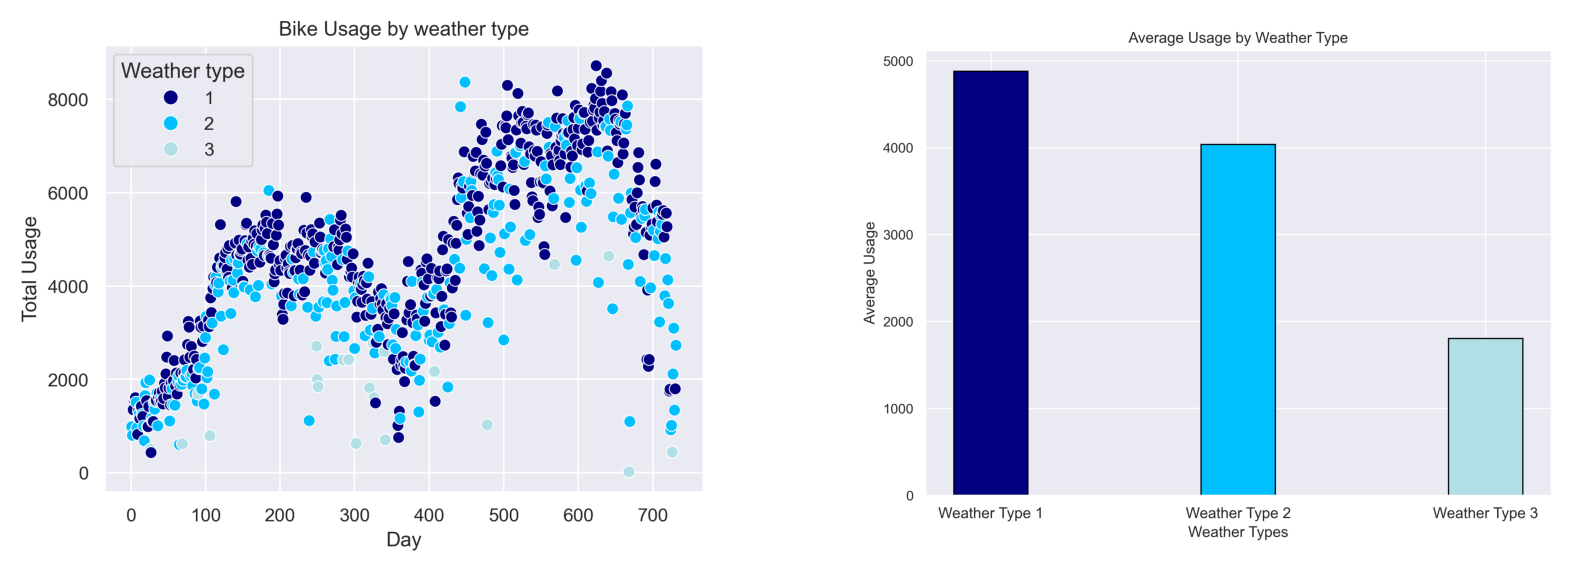

In [184]:
#import plots from methodology
image7 = mpimg.imread('Bike usage by weather type.png')
image8 = mpimg.imread('Average Usage by Weather type (bar graph).png')

plt.figure(figsize = (20,15))

plt.subplot(1,2,1)
plt.imshow(image7)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image8)
plt.axis('off')

plt.show()

The two figures above depict how different weather condition influence bike usage. However, in order to best understand these graphs it's important to clarify what each weather type means:
- Type 1 = Clear, few clouds
- Type 2 = Misty, Cloudy
- Type 3 = Light snow, light rain, storms


Taking a closer look at the first figure, it depicts the bike usage for each day within the dataset. However, this time the data is grouped by the weather type that occured on each day. As you can see from the figure, the greatest amount of bike usage typically occurs on days that exhibit weather type 1, though weather type 2 also sees a decent amount of bike usage. On the other hand, the smallest amount of bike usage tends to occur on days that exhibit weather type 3. So as weather conditions worsen, bike usage tends to decrease. The bar graph depicted in the second figure quantifies the bike usage for each weather condition by displaying the average (mean) bike usage for each type of weather. This provides greater clarity as to how the type of weather influences bike usage, as we can see that weather type 1 does indeed have the highest usage with weather type 2 being just slightly lower, and weather type 3 displaying a dramatic decrease in bike usage. The exact values for each weather type are as follows:
- Average total bike usage for Weather Type 1 is: 4877.0
- Average total bike usage for Weather Type 2 is: 4036.0
- Average bike usage for Weather Type 3 is: 1803.0

Overall, it's extremely obvious that the weather conditions on a given day also play a huge part in how many bikes will be used that day. On a day with weather type 3, average bike usage is over 3000 bikes lower than a day with weather type 1, and over 2000 bikes lower than a day with weather type 2. This is a very important insight to take note of, for if there is a part of the year that displays greater variance in its types of weather, it will also display more varied bike usage and therefore cause an increase in the error of my model. In order to investigate this theory, I will need to analyze how many types of weather occur for each individual season.

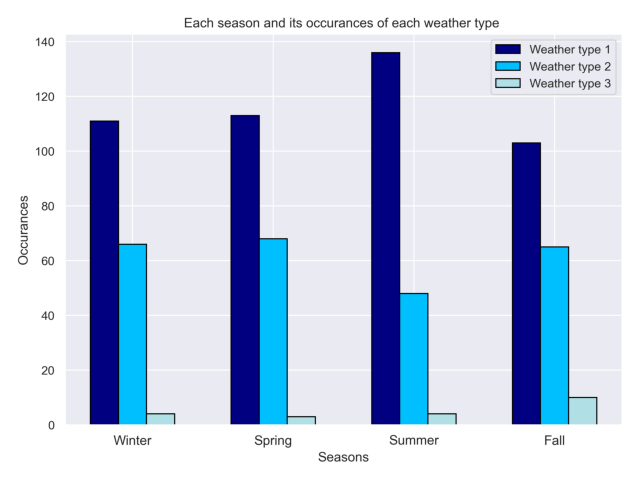

In [186]:
#import plots from methodology
image9 = mpimg.imread('Weather type by season.png')

plt.figure(figsize = (12,6))

plt.imshow(image9)
plt.axis('off')

plt.show()

The above figure depicts how many times each type of weather occurred during each season. The bars for winter and spring are very similar, which indicates that they exhibit roughly the same variance in weather conditions. The bars for summer indicate that summer consistently sees good weather conditions, and has the least amount of variance in weather. However, the bars for the season of fall tell a different story. Fall sees the most variation in weather out of the four seasons, and it specifically sees the greatest amount of weather type 3 occurences. The amount of weather 3 occurences in fall is roughly double, or maybe even triple in some cases, that of the other seasons. As stated previously, weather type 3 tends to correlate with a stark decrease in bike usage. Therefore, since fall sees an increase in weather type 3, it will have more instances of low bike usage compared to the other seasons, which will effectively increase the model's error during that part of the year. This helps explain why there was such a striking increase in the MAE and RMSE of fall, as the greater variance in bike usage value made it harder for the model to accurately fit the data in that portion of the year. Additionally, since weather type 3 has average uses that are less than those of type 1 and 2 by 3000 and 2000 respectively, it makes sense why the RMSE for fall rose drastically as RMSE is more sensitive to outlying pieces of data. All in all, it's extremely evident that weather condition also plays a pivotal role in influencing daily bike usage, and helps to further explain why there is error present in the model.

Finally, in order to get a broad view of how several of the variables within my dataset influence bike usage, I will take a look how day of the week and time of day influence bike usage. These variables will allow us to see when bikes are and aren't typically used, which in turn allows us to further conclude how this company can optimize their system.

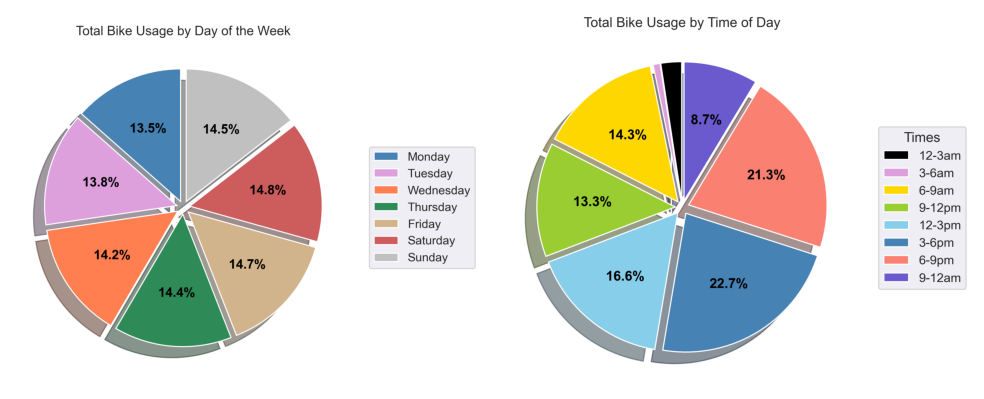

In [148]:
image10 = mpimg.imread('Usage by day of week (pie chart).png')
image11 = mpimg.imread('Usage by time of day (pie chart).png')

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(image10)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image11)
plt.axis('off')

plt.tight_layout()
plt.show()

Taking a look at the first figure, we can gather an idea on which days of the week see the most bike usage. From this pie chart, a general pattern can be seenas, starting on Monday, bike usage increases as the week progresses. Total bike usage sees its peak on Saturdays, while Sunday breaks the pattern as it falls slightly compared to Saturday. Overall, the distribution of bike usage is rather even throughout the week, with the highest amount of usage occuring on the weekends, but the maximum day of usage (Saturday) and the minimum day of usage (Monday) are only separated by 1.3%. The pattern that is seen in this pie chart is likely attributed to the behavior of the bike users as during the week bikes are likely used when people need to travel to other locations while they may be at work, and on the weekend there is a slight increase in bike users as people are using them for leisure activities.

The second figure details how bike usage varies depending on the time of day, divided into eight three-hour increments. This pie chart displays more variance in bike usage compared to the previous one, as some parts of the day yield far more bike usage than others. To begin, bike usage reaches its peak during the hours of 3pm - 9pm. This once again can likely be attributed to the behavior of the users and how these hours fit into their schedule. This is likely a time when a lot of people are biking home from work or biking to meet friends. The hours of 6am - 3pm all see an average amount of bike usage, which is likely due to the fact that this time frame is when people are biking to work or biking to lunch. Finally, the hours of 9pm - 6am see very low numbers of bike usage. 9pm - 12am sees some usage, which is likely due to a select few people who are either still out and about, or a biking home from late night activity. However, the hours of 12am - 6am see almost no bike usage which simply makes sense as this is when people will be asleep. These insights into what times of day, and what days of the week influence bike usage not only provides insight into the behaviors of the users of the bike system, but also provides us information that can be used to now confidently advise this company how their system can be improved and optimized in the future.

<u><h2>Final Conclusions and Discussion:</h2></u>

In the end, the main goal of everything that has been conveyed so far is so that an answer can finally be provided to the overall question that I am investigating: 
- **How can bike sharing systems such as this one be optimized?**

Firstly, creating a model of projected bike usage data provides companies such as Capital bikeshare crucial information. It allows them to get an idea of what their expected profits may look like in the future and what the size of their customer base might look like. Additionally, by being able to predict bike usage, the company can optimize their system by, for example, choosing days when the demand for bikes will be low to perform maintenance on bikes such as cleaning, inspecting, repairing, and replacing parts on their bikes. It will also allow them to know when they can take inventory and perform other duties without potentially taking bikes away from customers that will want to rent them on certain days.

My model was a decent fit to the Capital Bikeshare data as it had an r-squared of 0.712, but it did still display some forms of error which was evident in its MAE of 770.747 and its RMSE of 1038.745. In order to combat this, future models for this company should take into account other variables such as temperature and weather patterns in order to create a more accurate model, and provide more accurate predictions. This is crucial as a more accurate model will allow the company to have smoother and more effective methods of operation.

As stated earlier, Capital Bikeshare serves Washington, D.C., and some counties of the larger metropolitan area. So, analyzing the variables in the dataset and how they all relate to bike usage provided some unique insights that can allow the company to generate more customers in this area, as a more optimal company should be attracting as many customers as possible in order to increase their profits. By taking a look at the different variables in the data, we were able to gain insights on user behavior such as when they prefer to use bikes, and under what conditions they tend to do so. With this information, the company could run different deals and promotions that not only promote bike usage during peak times, but also encourage people to use the bike system during times and conditions that usage tends to decrease. Some potential promotions the company could run to increase their profits and optimize their business are as follows:
- "Peak Spin Savings" -  A promotion that reduces the cost of renting bikes during the busiest hours of 3pm - 9pm.
- "Road Less Traveled Discount" - Slightly discounted prices during conditions where people are often biking less such as colder temperatures, and worse weather conditions in order to encourage customers to use the system during these periods.
- "Gear up for the Week" - A promotion that may reduce costs on Monday as a new work week begins

<u><h2>Reflection:</h2></u>

Overall, this project was a lot of work, but I am satisfied with the results. However, there were a few obstacles that I ran into along the way that I had to work though. Firstly, curve_fit() initially wasn't able to model my data using a regular sine function even though my data obviously resembled a sine curve. It still wasn't able to work after I slightly tweaked the code to allow the amplitude to increase. I spent a lot of time wondering if I was doing something wrong, but after going to help room hours I was told my code was right, but my sine equation just didn't fit my data well enough. Finally though, I was able to come to the solution of modeling my data with the modified sine function that is described in the results portion. That was my biggest challenge, and in the future when I have more coding experience I would like to try and model this data again in a way that implements my findings from variables such as temperature and weather conditions. The only other obstacles I faced was figuring out how to make some of the visuals that were newer to me like the pie charts, but for the most part everything went very well.

<u><h2>Academic Integrity Statement:</h2></u>

I, Connor Curtis, commit to upholding my own ethical standards, and the ethical standards of Michigan State University as I complete my education. I will be a kind, respectful, and responsible student here at Michigan State University, and I will always commit to creating work that is my own and that I am proud of. I will avoid plagiarism and cite external sources that I used, and will give my best effort to the classes that I take at this school.


<u><h2>References:</h2></u>

- Matplotlib Pie Charts. (n.d.). Www.w3schools.com. https://www.w3schools.com/python/matplotlib_pie_charts.asp
  
- Matplotlib documentation — Matplotlib 3.5.0 documentation. (n.d.). Matplotlib.org. https://matplotlib.org/stable/

- Waskom, M. (2021). seaborn: statistical data visualization — seaborn 0.10.1 documentation. Seaborn.pydata.org. https://seaborn.pydata.org/index.html

- Computational Modeling and Data Analysis I — CMSE 201. (2023). Github.io. https://msu-cmse-courses.github.io/cmse201-s25-jb/intro.html

- Nema, T. (2018, April 4). f-strings in Python. GeeksforGeeks. https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/

- jeeteshgavande30. (2020, March 27). Bar Plot in Matplotlib. GeeksforGeeks. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

- Sabbha. (2024, August 16). Understanding MAE, MSE, and RMSE: Key Metrics in Machine Learning. DEV Community.
https://dev.to/mondal_sabbha/understanding-mae-mse-and-rmse-key-metrics-in-machine-learning-4la2

- Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.

- OpenAI. (2025). ChatGPT (April 21 version) [Large language model]. https://chat.openai.com
    - Prompt: “Very small pie chart slivers are causing the displayed percents to overlap. How can I get rid of percent values on just the small pieces?”  I then used a function created by Chat GPT to solve my problem, and create the hourly pie chart. (April 20, 2025)
      
    - Prompt: “How can I create the equation of a sine curve the increases in amplitude, but eventually flattens out?” I then used its response to build my amplitude part of my curve_fit function (April 8, 2025)
